<a href="https://colab.research.google.com/github/alxgambati/mvp_puc_2023_data_exploratory_and_visualization/blob/main/US_Census_Income_Prediction_MVP_Sprint_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pós Graduação Ciência de Dados e Analytics PUC-RIO

# MVP Sprint Análise e Boas Práticas

### Aluno: Alexandre de Souza Gambati

### Predição de Alta Renda a partir dos dados do censo americano de 1994
### Dezembro/2023





##1.Definição do Problema














O dataset usado neste projeto será o **Adult**, proveniente da plataforma UCI, que contém dados extraídos do Censo Americano de 1994.  Para mais detalhes sobre este dataset, consulte: https://archive.ics.uci.edu/dataset/2/adult

Será realizada Análise explorátoria dos dados para compreender os atributos do dataset, verificar a existencia de valores faltantes, compreender a distribuiçao dos dados, e verifificar as correlações entre os atributos e a classe target (income)

**Qual é a descrição do problema?** Identificar os atributos que mais contribuem para predizer se uma pessoa possui alta renda, ou seja, se a pessoa teve uma renda maior do que 50 mil dólares americanos no ano de 1994.

**Problema de aprendizado supervisionado ou não supervisionado?** Não será utilizado algoritmo de aprendizado neste projeto.

**Premissas ou hipóteses você tem sobre o problema?** "Existem atributos que tem muito maior contribuição para a situação de alta renda de uma pessoa".

**Restrições ou condições foram impostas para selecionar os dados?** A extração dos dados do censo americano de 1994 foram realizadas por  Barry Becker usando as seguintes condições de filtragem dos dados dno dataset original do censo:  ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))


**Informações sobre os atributos:**

1. **age**: idade da pessoa.
2. **workclass**:  categoria da classe de trabalho (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.)
3. **fnlwgt**:  fator de ponderação usado para ajustar os dados de amostra a fim de fazer inferências sobre a população total com base nos dados amostrais.
4. **education**: categoria do nível de educação (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
5. **education-num**:  número de anos de educação
6. **marital-status**:  categoria do estado civil (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.)
7. **occupation**: categoria da ocupacao (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.)
8. **relationship**: categoria do relacionamento (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.)
9. **race**:  categoria da raça (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.)
10. **sex**:  sexo da pessoa (Feminino ou Masculino)
11. **capital-gain**:  ganho de capital, proveniente da alienação de ativos.
12. **capital-loss**:  perda de capital, proveniente da alienação de ativos.
13. **hours-per-week**:  horas de trabalho por semana
14. **native-country**:  categoria do país de origem (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.)
15. **income**:  indica se a renda da pessoa é maior ou menor do que 50K USD por ano.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse

In [2]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

##2.Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar um dataset obtido através da biblioteca ucimlrepo.

Com o dataset caregado, irei explrá-lo um pouco.


In [3]:
# importar o dataset utilizando a biblioteca da UCI
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# Informa a URL de importação do dataset
url = adult.metadata.data_url

# Lê o arquivo utilizando a url
dataset = pd.read_csv(url)

# Verificando se o tipo do objeto é um dataset do pandas
type(dataset)

pandas.core.frame.DataFrame

In [4]:
# Mostrando as dimensões do dataset
print(dataset.shape)


(48842, 15)


In [5]:
# Verficando as primeiras linhas do dataset
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


A seguir, aplica-se um gradiente de cores da paleta "Purples" às células das primeiras linhas do DataFrame dataset, colorindo as células com base em seus valores para fins de visualização estilizada.

In [6]:
dataset.sample(n=10, random_state=2).style.background_gradient(cmap = "Purples")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
41945,27,Private,184493,HS-grad,9,Separated,Handlers-cleaners,Own-child,White,Female,0,1594,25,United-States,<=50K.
3260,34,Private,223212,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1848,40,Peru,>50K
20109,44,Private,67065,Assoc-voc,11,Never-married,Priv-house-serv,Not-in-family,White,Male,594,0,25,United-States,<=50K
19725,38,Self-emp-not-inc,146042,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,3103,0,60,United-States,>50K
45867,34,Private,302570,HS-grad,9,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,36,United-States,<=50K.
14670,22,Private,215395,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,37,United-States,<=50K
26345,22,Private,409230,12th,8,Never-married,Transport-moving,Other-relative,White,Male,0,0,40,United-States,<=50K
33222,63,Private,281025,9th,5,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,32,United-States,<=50K.
34005,27,Private,134890,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.
30862,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<=50K


As primeiras cinco linhas do dataset exibidas acima demonstram as seguintes **informações quantitativas** mais relevantes, a saber:

*   a **idade** (coluna "**age**") das pessoas que foram pesquisadas no censo;
*   na coluna **"fnlwgt"** que pode ser usada para como fator de ponderaração para ajustar os dados para corresponder a populaçao total pesquisada.
*   o **anos de educação** (coluna "**education-num**") apresenta o número de anos que a pessoa estudou;
*   o **ganho/perda de capital** (colunas "**capital-gain**" e "**capital-loss**") apresentam valor zero em muitos casos e valores positivos em outros casos.  representam ganhos/perdas de capital decorrentes de alienação de ativos;
*   o **horas de trabalho por semana** (coluna "**hours-per-week**") apresenta o quantitativo de horas de trabalho semanal.

##3.Análise de Dados

###3.1.Descrição do Dataset

A seguir são examinadas as dimensões e características do dataset, suas informações e alguns exemplos de linhas.

In [7]:
# Mostra as dimensões do dataset
print(dataset.shape)

(48842, 15)


O dataset possui e **48842 instâncias** (linhas) e **15 atributos** (colunas).



In [8]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


O resumo acima informa que o dataset possui registros com valores faltantes (nulos) para as colunas **workclass**, **occupation** e **native-country**, uma vez que a contagem de nao-nulos é inferior ao numero total de registors.   Isso pode ser confirmado com o comando a seguir:

In [9]:
dataset.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

A seguir é apresentada uma amostra dos registros do dataset em que algum atributo possua valor nulo

In [10]:
dataset[dataset.isnull().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32565,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
32567,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.
32574,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K.
32580,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K.
32583,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K.
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K.


Verifica-se que os atributos **workclass**, **occupation** e **native-country** podem possuir valor NaN (Not a Number), ou seja nulos.

In [11]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Os tipos de dados (**Dtypes**) de cada atributo do dataset sob análise estão listados no resumo acima.   Os atributos do tipo "object" se referem a variáves categóricas.

**Verificação das categorias de cada uma dos atributos categoricos**

In [12]:
atributos_categoricos = dataset.select_dtypes(include=['category', 'object']).columns.tolist()
print(atributos_categoricos)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


categorias presentes em cada atributo categórico

In [13]:
for atributo in atributos_categoricos:
    valores_unicos = dataset[atributo].unique()
    print(f"{atributo}: {valores_unicos}")

workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'En

os atributos **workclass**, **occupation** e **native-country** possuem valores '?' e NaN que indicam o mesmo valor semantico (indefinido) de modo que deverá ser realizado pre-processamento nesses dados:

**Um achado muito importante:**  O atributo income possui valores digitados de formas diferentes (com ou sem ponto final) que se referem ao mesmo valor.   Será necessário realizar pre-processamento desses dados.

###3.2.Estatísticas Descritivas

Em primeiro lugar, há que se registrar que a coluna **fnlwgt** será omitida (usando o comando drop) pois ela é utilizada apenas para fins de ponderaçao de ajuste dos valores da amostra para o caso de se desejar extender os resultados para a populacao original.   Essa coluna será posteriormente eliminada na fase de pre-processamento.

In [14]:
# Faz resumo estatístico do dataset, excluindo a coluna fnlwgt
dataset.drop('fnlwgt', axis=1).describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Acima foi exibido *resumo estatístico das variáveis numéricas* do dataset, e nele pode-se perceber as seguintes observações:


**age**:

Na coluna "age," a idade varia de 17 a 90 anos, com desvio padrão (std) de 13,71, e mediana de 37 anos.
O valor médio é de 38,64 anos, indicando uma tendência central próxima à mediana.
O percentil 25 é 28 anos, o que significa que 25% dos dados têm 28 anos ou menos.
O percentil 75 é 48 anos, indicando que 25% dos dados têm 48 anos ou mais.

**education-num**:

Na coluna "education-num," a faixa vai de 1 a 16, representando o número de anos de educação concluídos.
A média é de cerca de 10.08, com um desvio padrão de 2.57.
A mediana é de 10.00, o que sugere uma distribuição aproximadamente simétrica.
Os percentis 25 e 75 são 9.00 e 12.00, respectivamente, mostrando uma variedade de níveis de educação.

**capital-gain**:

Na coluna "capital-gain," os valores variam de 0 a 99,999, com uma grande variabilidade.
A média é de 1,079.07, mas a mediana é 0.00, indicando uma assimetria significativa.
O desvio padrão é elevado, com 7,452.02, sugerindo uma dispersão notável.
A maioria dos valores (percentis 25 e 75) é 0.00, com ganhos de capital consideráveis em alguns casos.

**capital-loss**:

Na coluna "capital-loss," os valores variam de 0 a 4,356.
A média é de 87.50, com uma dispersão considerável (desvio padrão de 403.00).
A mediana é 0.00, sugerindo uma concentração de perdas menores.
A maioria dos valores (percentis 25 e 75) é 0.00, com algumas perdas de capital substanciais em outros casos.

**hours-per-week**:

Na coluna "hours-per-week," as horas trabalhadas por semana variam de 1 a 99.
A média é de 40.42, com um desvio padrão de 12.39, indicando alguma variabilidade nas horas de trabalho.
A mediana é 40.00, o que sugere uma distribuição aproximadamente simétrica.
Os percentis 25 e 75 são 40.00 e 45.00, mostrando a faixa típica de horas de trabalho.



###3.3.Visualizações Unimodais

Vamos criar agora um **histograma** para cada atributo (variável quantitativa) do dataset, e veremos que:

*   O atributo "age" segue uma **distribuição exponencial** (assimétrica à direita).
*   Os atributos "capital-gain" e "capital-loss" seguem uma **Distribuição de Poisson**, uma vez que concentrados em poucos valores.
*   Os demais atributos como "education-num", "hours-per-week" **distibuição normal**.   "education-num" pode ser bimodal.




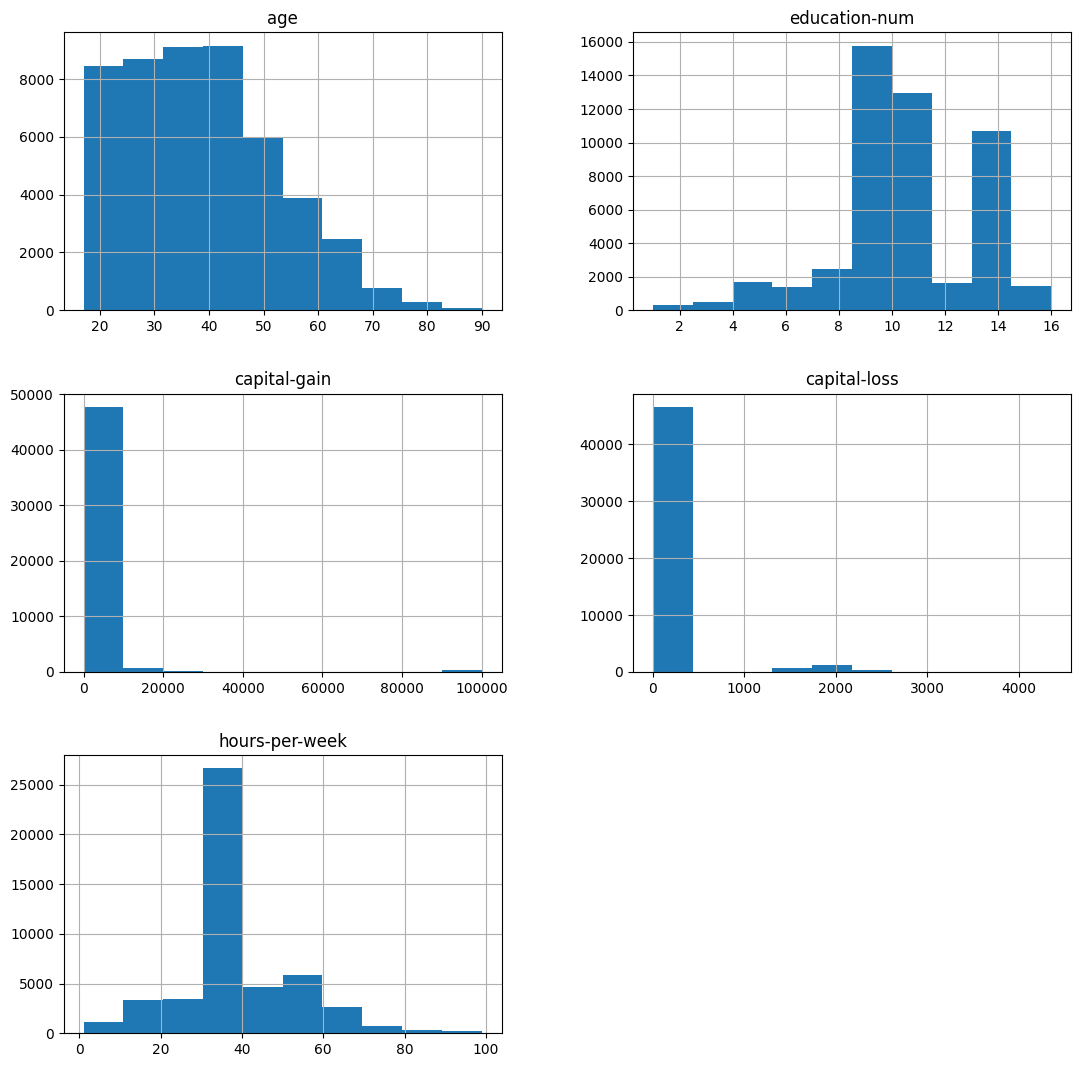

In [15]:
# Histograma
dataset.drop('fnlwgt', axis=1).hist(figsize = (13,13))
plt.show()


O **Gráfico de Densidade**, ou **Density Plot**, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição dos atributos do dataset.

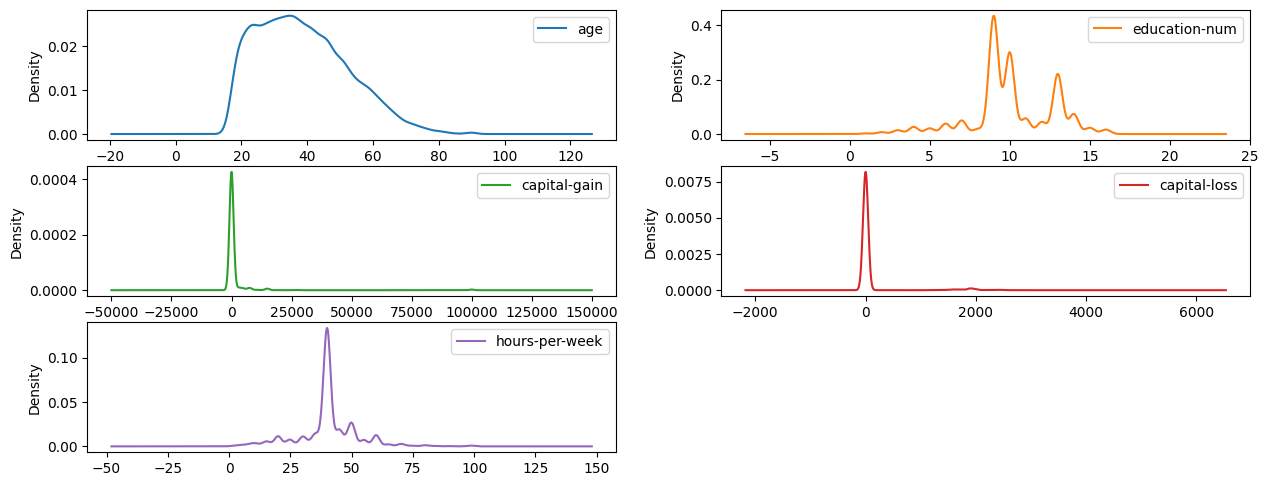

In [16]:
# Density Plot
dataset.drop('fnlwgt', axis=1).plot(kind = 'density', subplots = True, layout = (12,2), sharex = False, figsize = (15,24))
plt.show()

**Análise por boxplots**


A seguir é apresentada a visualização de **boxplot**s. No boxblot, a linha no centro (verde) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

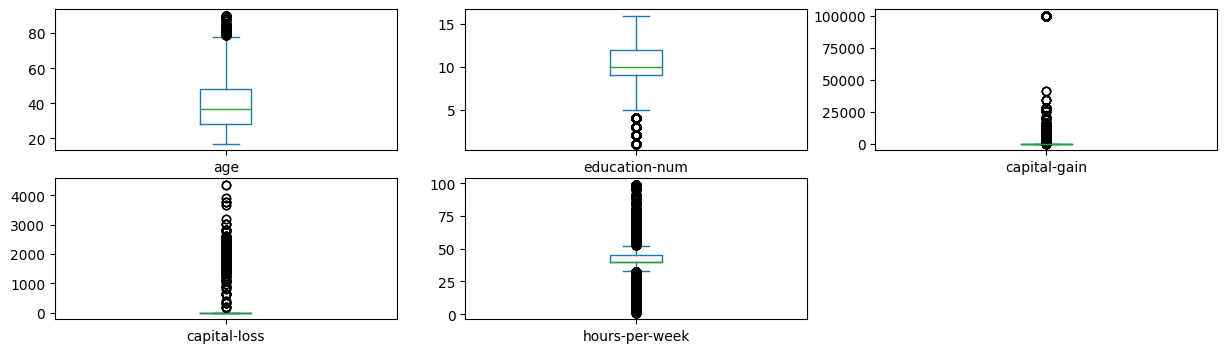

In [17]:
# Boxplot
dataset.drop('fnlwgt', axis=1).plot(kind = 'box', subplots = True, layout = (12 ,3), sharex = False, sharey = False, figsize = (15, 26))
plt.show()


Atavés da inspeção dos boxplot é possível verificar a presença de outliers em todas os atributos numéricos.

**Avaliação da Cardinalidade dos Atributos Categóricos**

Avaliação do número de ocorrências únicas para cada categoria em cada atributo categórico.

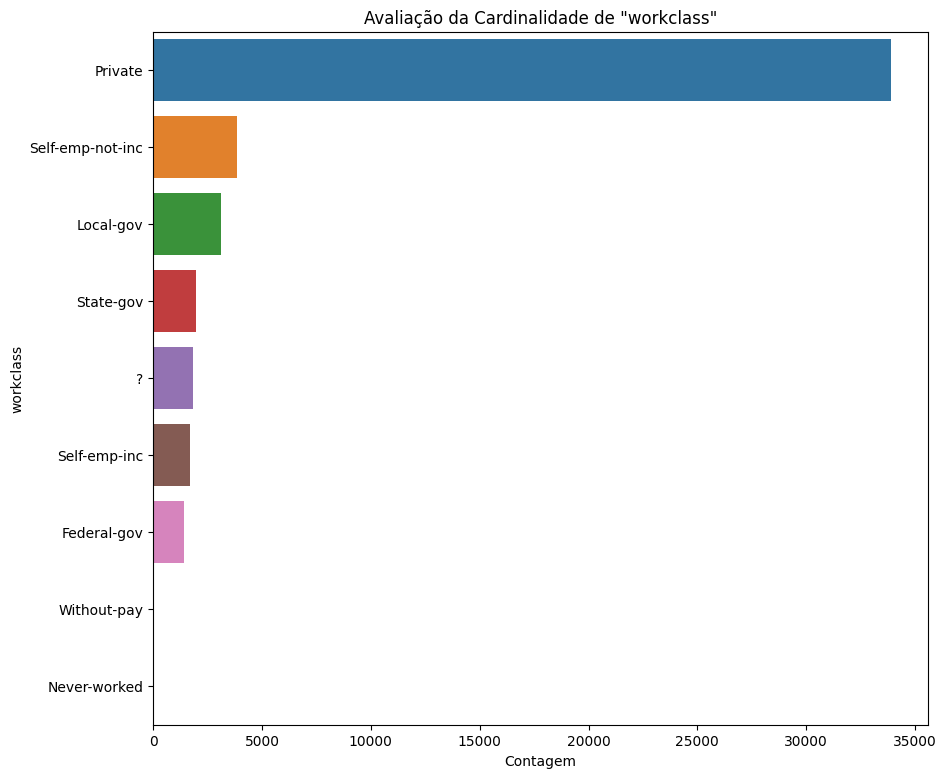

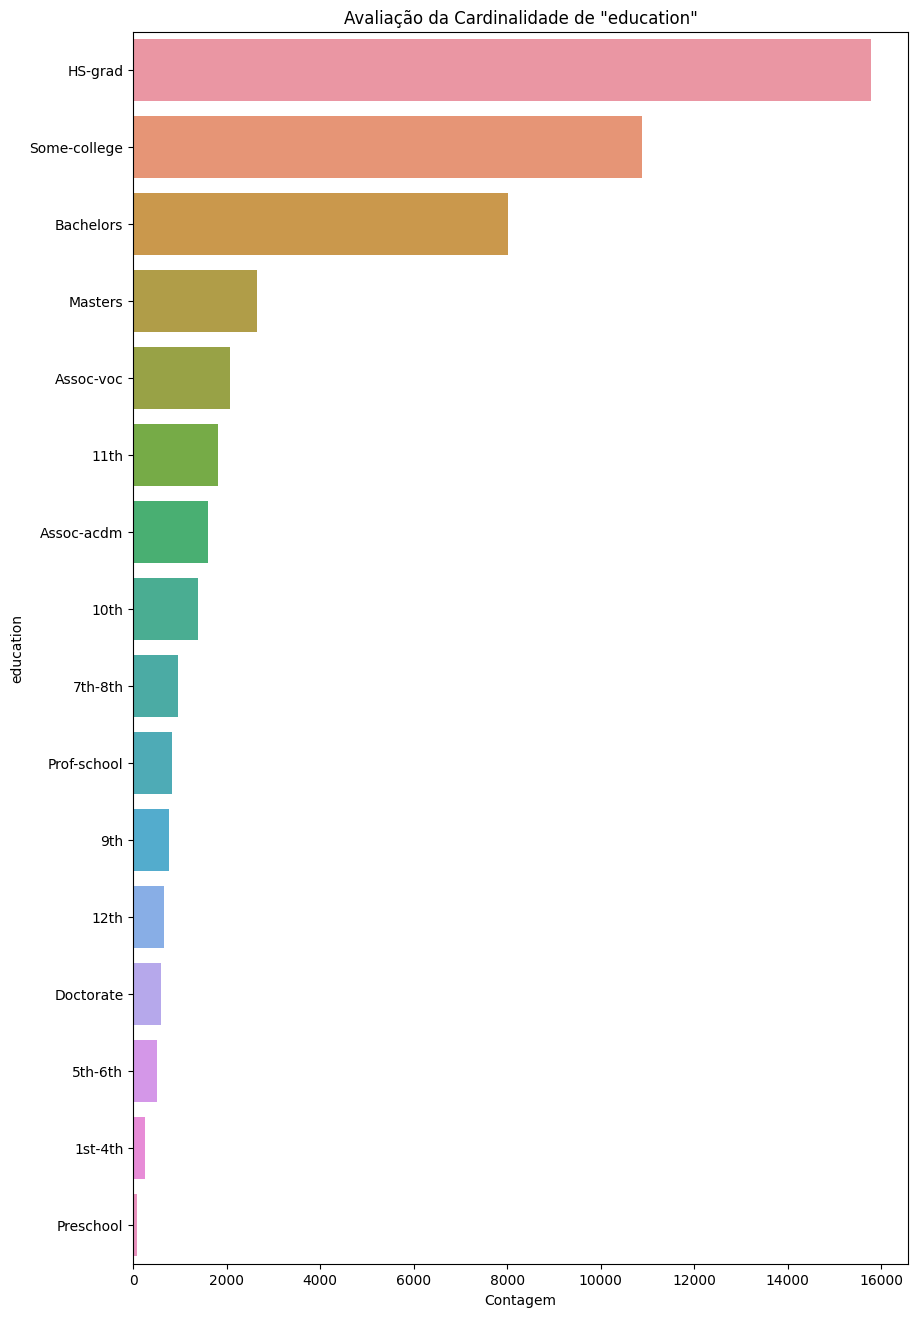

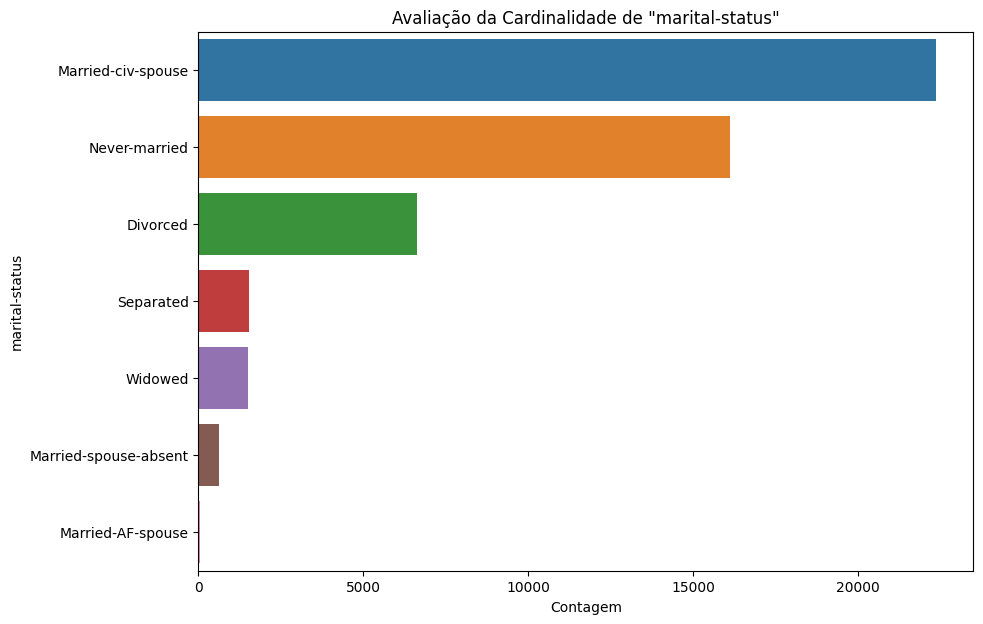

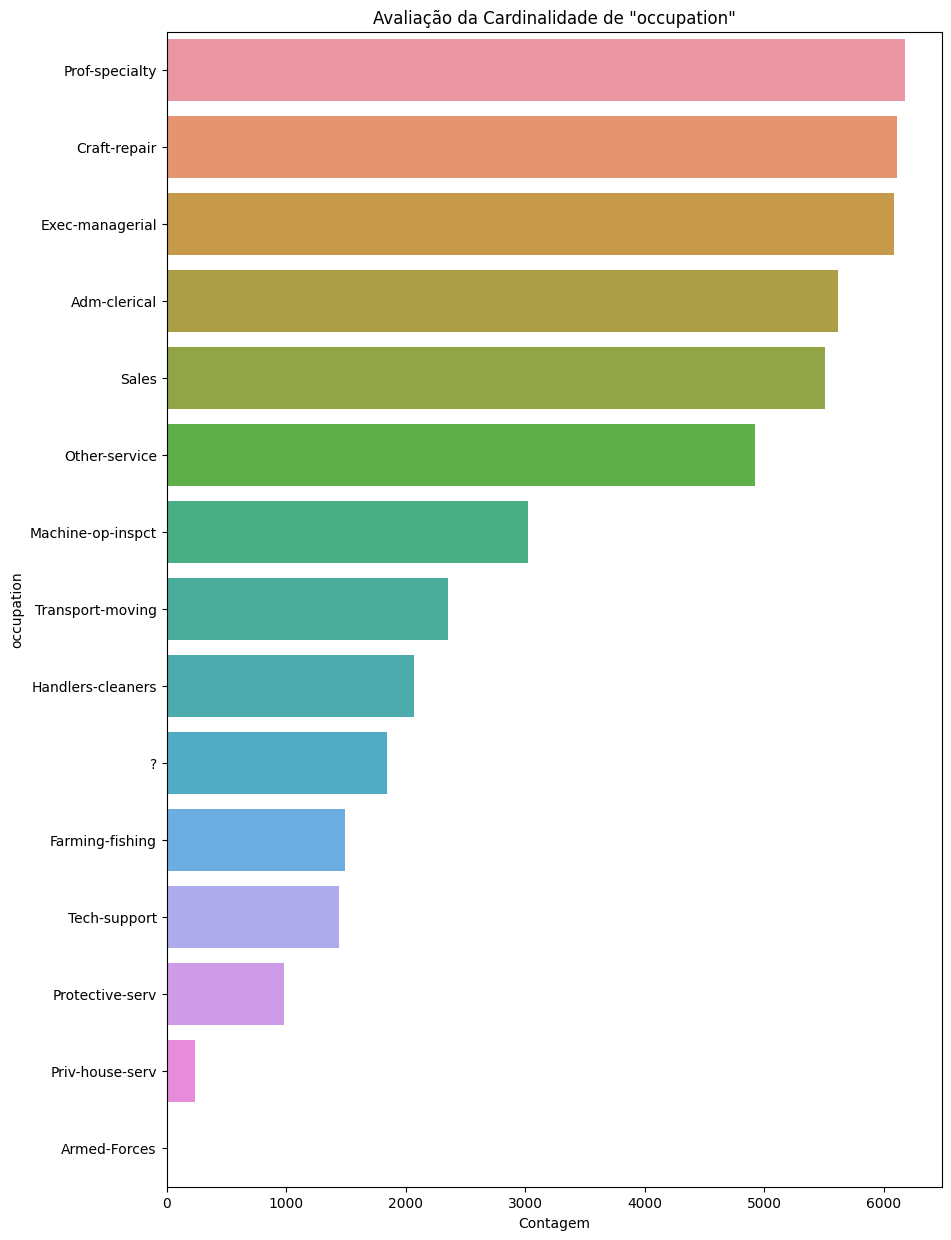

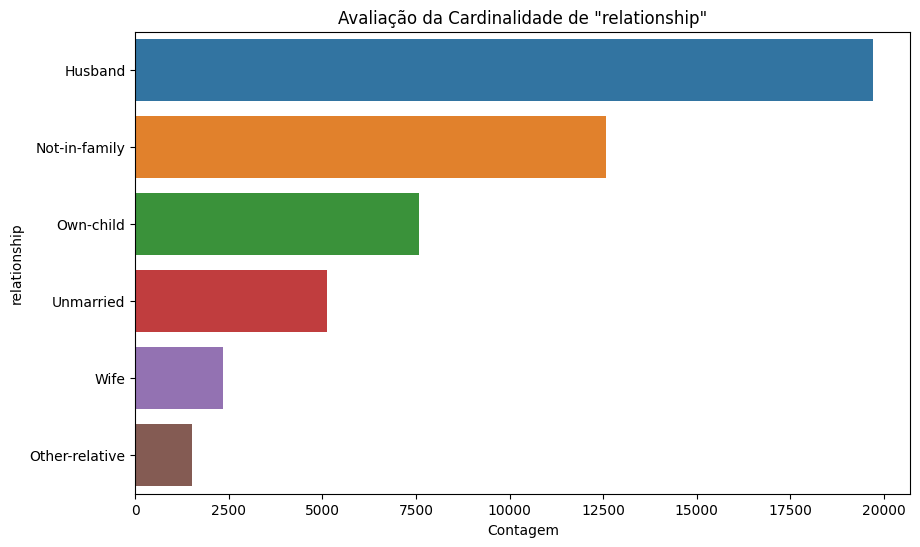

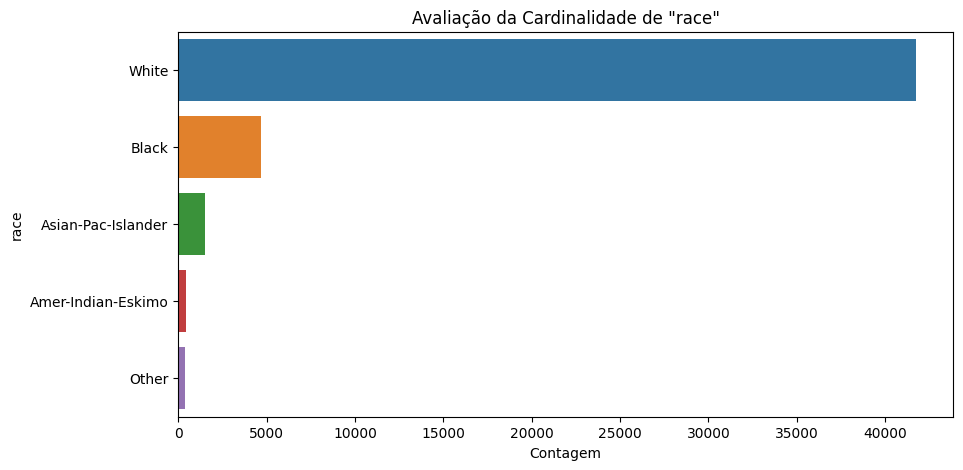

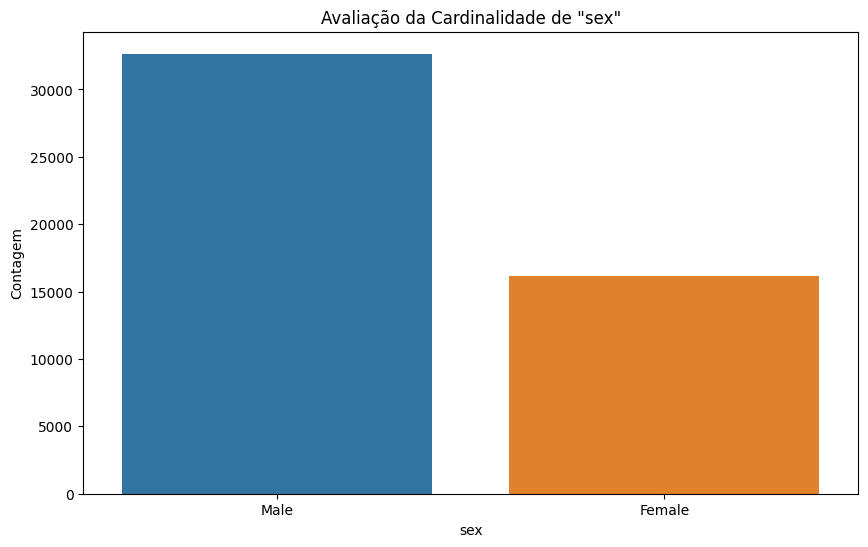

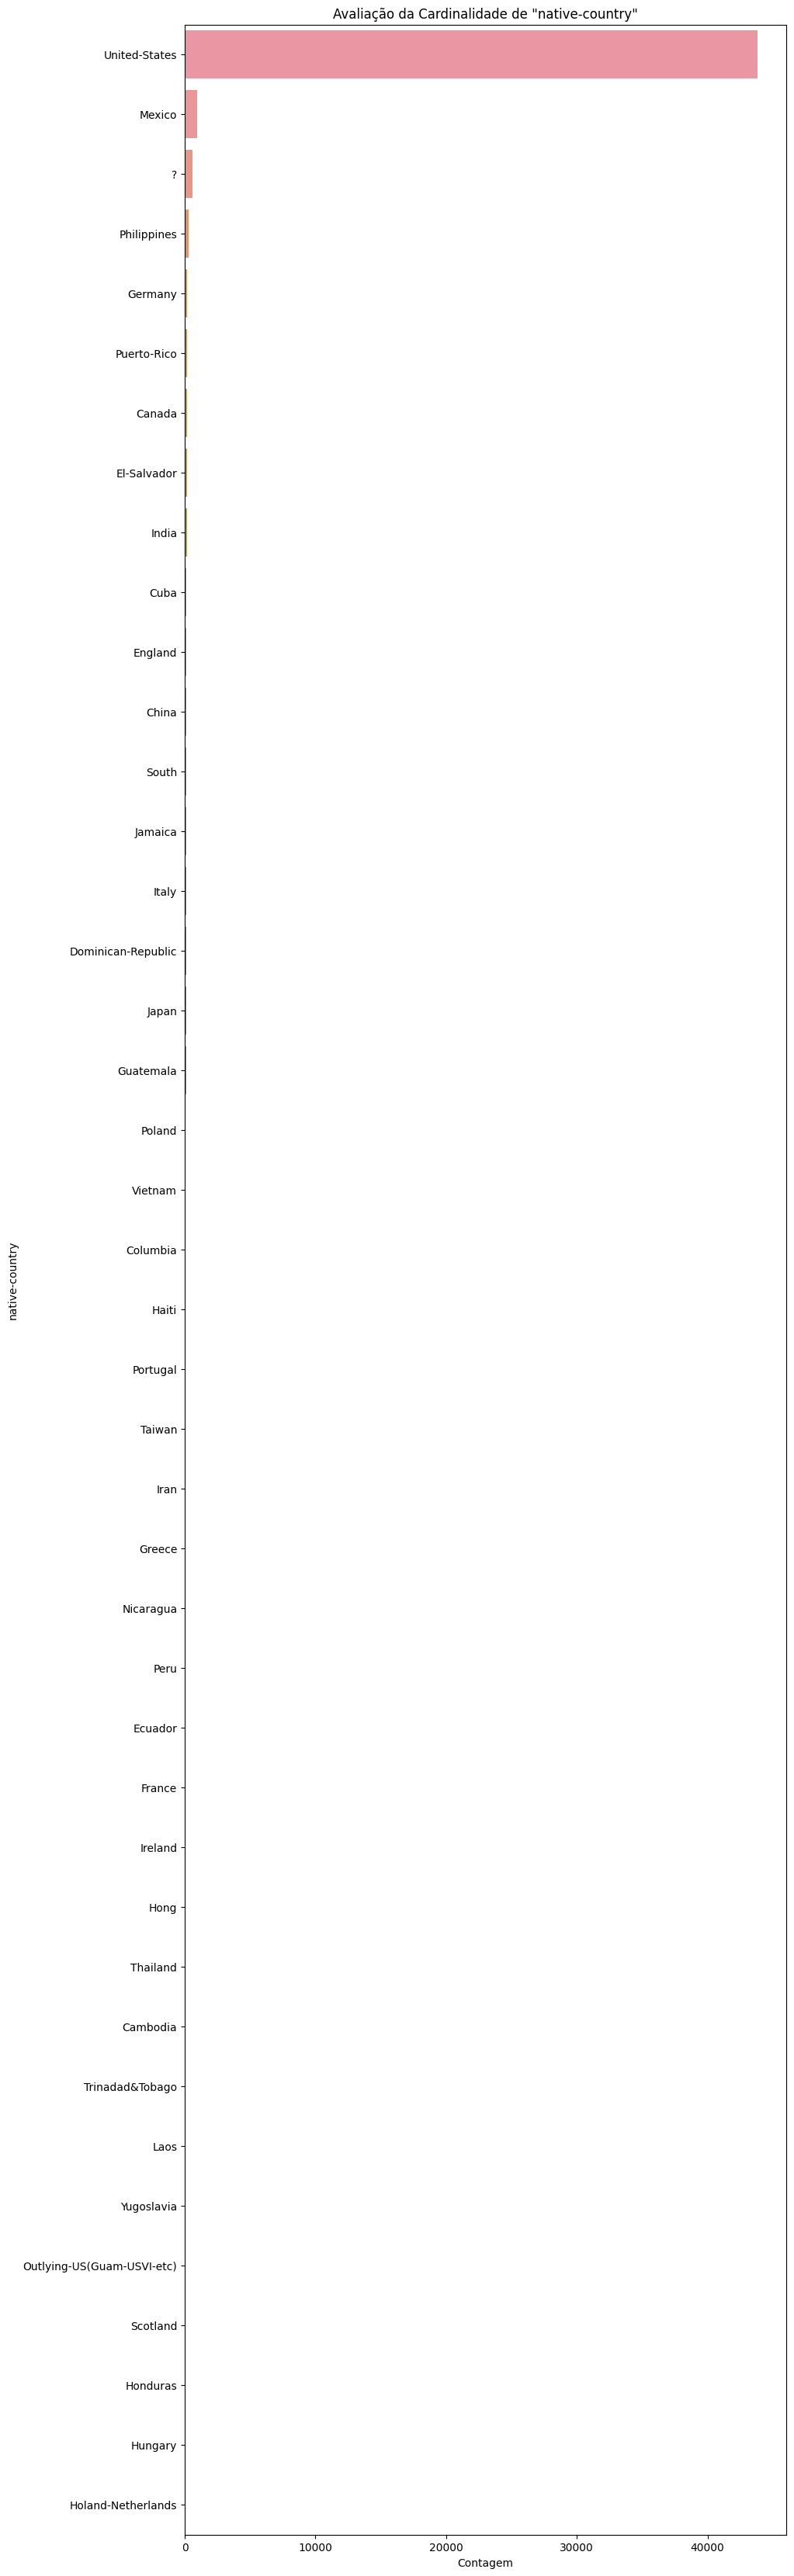

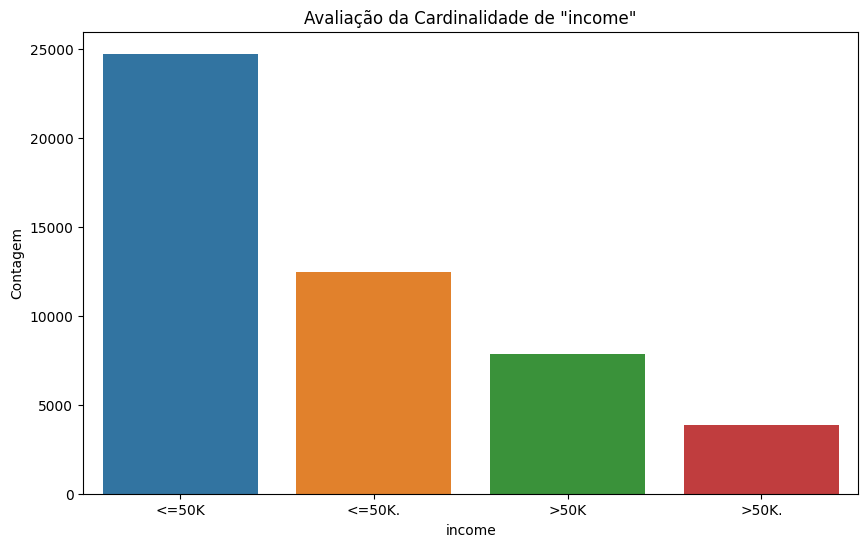

In [18]:
# Suponhamos que 'dataset' seja o seu DataFrame e 'atributos_categoricos' seja a lista de atributos categóricos
for atributo in atributos_categoricos:
    numero_de_categorias = dataset[atributo].nunique()

    if numero_de_categorias <= 4:
        # Se houver 4 ou menos categorias, baixa cardinalidade, não transponha o gráfico
        plt.figure(figsize=(10, 6))
        sns.countplot(data=dataset, x=atributo, order=dataset[atributo].value_counts().index)
        plt.title(f'Avaliação da Cardinalidade de "{atributo}"')
        plt.xlabel(atributo)
        plt.ylabel('Contagem')
    else:
        # Se houver mais de 4 categorias, alta cardinalidade, transponha o gráfico
        plt.figure(figsize=(10, numero_de_categorias))  # Ajuste a altura da figura com base no número de categorias
        sns.countplot(data=dataset, y=atributo, order=dataset[atributo].value_counts().index)
        plt.title(f'Avaliação da Cardinalidade de "{atributo}"')
        plt.xlabel('Contagem')
        plt.ylabel(atributo)

    plt.show()



A partir dos gráficos anteriores, é possível verificar a quantidade e a frequencia de cada categoria de cada atributo.

##4.Pré-processamento de Dados

Tendo por base as verificações da etapa de análise de dados, a seguir será realizada uma etapa de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection)

###4.1.Tratamento de Missings e Limpeza

Como verificado na etapa anterior, os atributos **workclass**, **occupation** e **native-country** possuem registros com valores faltantes (nulos ou NaN), conforme pode ser confirmado a seguir:

In [19]:
colunas_com_valores_nulos = dataset.columns[dataset.isnull().any()].tolist()
dataset.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Além disso, foi verificado que esses mesmos atributos são categóricos e uma de suas categorias é o valor '?' que pode ser entendido como *indefinido*.   Assim, esse valor pode ser juntado com o valor nulo (NaN) pois ambos tem o mesmo valor semantico.

Dessa forma, iremos transformar os valores nulos em valores categoricos '?'

In [20]:
dataset = dataset.fillna('?')  #preenche os nulos com o valor '?'
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

A seguir, apresentamos as categorias que remanescem para os atributos que continham valores nulos

In [21]:
for coluna in colunas_com_valores_nulos:
    valores_unicos = dataset[coluna].unique()
    quantidade_de_interrogacoes = (dataset[coluna] == '?').sum()
    print(f"{coluna}: {valores_unicos}")
    print(f"{coluna}: {quantidade_de_interrogacoes} registros com valores '?'")

workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
workclass: 2799 registros com valores '?'
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
occupation: 2809 registros com valores '?'
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
native-country: 857 registros com valores '?'


**Tratamento da coluna income**

O atributo income possui valores diferentes que correspondem ao mesmo valor semantico, apenas diferenciando quanto a forma de digitacao do dado em que alguns casos recebeu um ponto

In [22]:
dataset['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

Uma solução para esse caso é renomear a coluna como 'income_greater_50k' e usar valores booleanos zero e 1



In [23]:
dataset = dataset.rename(columns={'income': 'income_greater_50k'})

# Mapear os valores para 0 ou 1
dataset['income_greater_50k'] = dataset['income_greater_50k'].replace(['<=50K', '<=50K.'], 0)
dataset['income_greater_50k'] = dataset['income_greater_50k'].replace(['>50K', '>50K.'], 1)

In [24]:
dataset['income_greater_50k'].unique()

array([0, 1])

A seguir verificamos se a nova coluna possui o valor de int64 para lidar com os valores de 0 e 1.

In [25]:
dataset.dtypes

age                    int64
workclass             object
fnlwgt                 int64
education             object
education-num          int64
marital-status        object
occupation            object
relationship          object
race                  object
sex                   object
capital-gain           int64
capital-loss           int64
hours-per-week         int64
native-country        object
income_greater_50k     int64
dtype: object

Finalmente, iremos descartar a coluna **fnlwgt** uma vez que esta não será utilizada para o problema que desejamos resolver.   Vale registrar que esta coluna seria utilizada apenas para fins de ponderaçao de ajuste dos valores da amostra para o caso de se desejar extender os resultados para a populacao original.

In [26]:
dataset.drop('fnlwgt', axis=1, inplace=True)
dataset.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country',
       'income_greater_50k'],
      dtype='object')

###4.2 Transformações Numéricas

4.2.1.Normalização e Padronização

A Normalização poderia seria ser aplicada nas variáveis quantitativas (exibidas abaixo - dtypes int64 e float64) para redimensioná-las e para que a distribuição desses dados deste dataset sob análise fique "normal". **No entanto, esta técnica não foi aplicada neste momento do estudo**.

Cabe ressaltar, que a Normalização não seria aplicada com todo o dataset e sim seguindo a boa prática recomendada para evitar o data leakage, preparando os dados no conjunto de dados do treino, determinando o mínimo e o máximo deste conjunto, e aplicando a preparação de dados no conjunto de treino e teste separadamente, utilizando os valores mínimo e máximo do conjunto de treino. (para em seguida construir a avaliar modelos de ML).

In [27]:
dataset.select_dtypes(include='number')

,age,education-num,capital-gain,capital-loss,hours-per-week,income_greater_50k
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0
...,...,...,...,...,...,...
48837,39,13,0,0,36,0
48838,64,9,0,0,40,0
48839,38,13,0,0,50,0
48840,44,13,5455,0,40,0


###4.3.Transformações Categóricas

Vamos transformar as variáveis categóricas, ou seja, as qualitativas, (exibidas abaixo - dtypes Object) em numéricas, através da técnica One-hot enconcoding, usando o método nativo do pandas - getdummies.

In [28]:
dataset.select_dtypes(include=['object']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [29]:
dataset.select_dtypes(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States
48838,?,HS-grad,Widowed,?,Other-relative,Black,Male,United-States
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States


In [30]:
# Identificando atributos categóricos
atributos_categoricos = dataset.select_dtypes(include='object').columns.tolist()
atributos_categoricos

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [31]:
dataset_one_hot_encoded = pd.get_dummies(dataset.select_dtypes(include=['object']), columns=atributos_categoricos)

In [32]:
dataset_one_hot_encoded

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


O dataset obtido após a aplicação do método get_dummies é um resultado do processo de One-Hot Encoding, uma técnica utilizada para lidar com variáveis categóricas em modelos de aprendizado de máquina. Vamos entender o propósito e a utilidade do dataset resultante:

Representação de Variáveis Categóricas:

O One-Hot Encoding é usado quando se tem variáveis categóricas, ou seja, variáveis que representam categorias ou rótulos. Essas variáveis são convertidas em uma representação binária, onde cada categoria se torna uma coluna binária (0 ou 1).

**Compatibilidade com Modelos de Machine Learning:**

Muitos algoritmos de aprendizado de máquina requerem que todas as entradas sejam numéricas. Ao realizar o One-Hot Encoding, é possível converter variáveis categóricas em um formato que pode ser facilmente interpretado por esses algoritmos.

**Evita Ambiguidade de Ordinalidade:**

O One-Hot Encoding é útil quando as variáveis categóricas não têm uma ordem intrínseca entre as categorias. Ele evita que o modelo faça suposições incorretas sobre a ordem das categorias, o que poderia acontecer se fosse usada uma codificação ordinal.

**Flexibilidade na Manipulação de Categorias:**

A técnica cria uma coluna binária para cada categoria única presente nos atributos categóricos. Isso oferece flexibilidade, pois o modelo pode então pesar a importância de cada categoria independentemente.

**Facilita o Treinamento de Modelos:**

Muitos modelos de machine learning, como regressão linear, SVM, redes neurais, entre outros, funcionam melhor com dados numéricos. A aplicação do One-Hot Encoding facilita o treinamento desses modelos.

**Interpretação Intuitiva:**

A interpretação do resultado final torna-se mais intuitiva, pois as colunas binárias indicam diretamente a presença ou ausência de uma categoria específica.
Compatibilidade com Bibliotecas de Machine Learning:

Bibliotecas populares de machine learning, como scikit-learn, suportam facilmente dados no formato resultante do One-Hot Encoding.

No entanto, é importante observar que o aumento na dimensionalidade do conjunto de dados (devido à criação de várias colunas binárias) pode ter implicações em termos de desempenho computacional e pode exigir cuidados adicionais na escolha e treinamento de modelos. Portanto, a aplicação do One-Hot Encoding deve ser feita considerando a natureza do problema e os requisitos específicos do modelo que está sendo utilizado.

##5.Visualizações Multimodais

Uma vez realizada a limpeza e o tratamento dos dados, é possível proceder as avaliações das correlações entre os atributos, a fim de determinar aqueles que mais contribuem para a verificação de que uma pessoa possua alta renda, ou seja, se obteve renda superior a 50 mil dólares americanos no ano de 1994.

Para tanto, uma vez que estamos utilizando um atributo target ('income_greater_50k') que é categórico, podemos determinar o coeficiente de correlação de Pearson, que pode ser:

* Próximo de -1 : há uma correlação negativa entre as variáveis,
* Próximo de +1: há uma correlação positiva entre as variáveis,
* 0: não há correlação entre as variáveis.

OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.

###5.1 Correlações da alta renda com os atributos numéricos

A seguir é apresentada a correlação entre o atributo target ('income_greater_50k') e as variáveis numéricas do dataset

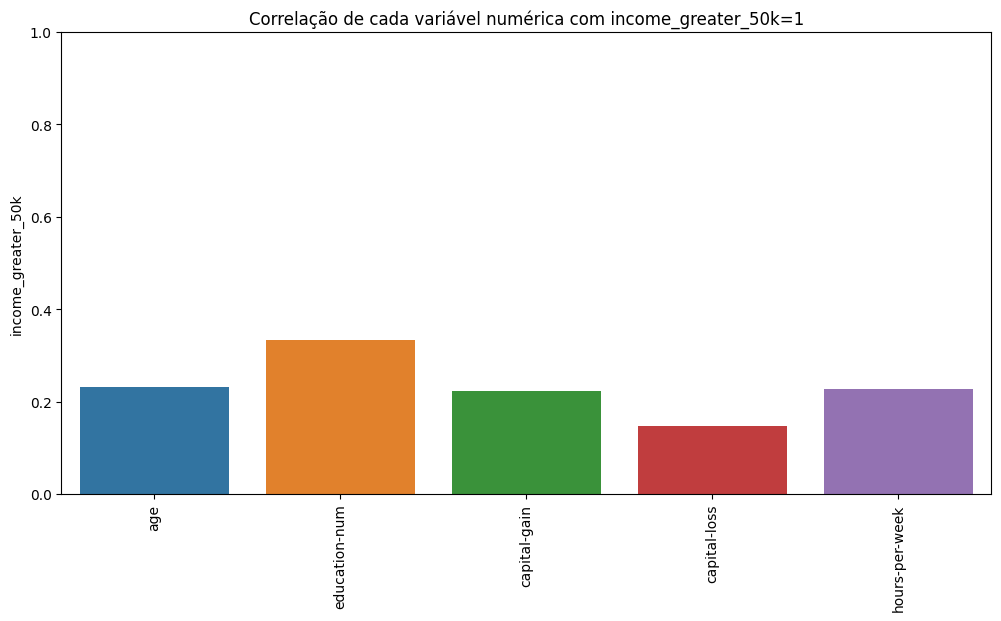

In [33]:
target_column = 'income_greater_50k'

# Calcule a correlação de Pearson entre cada variável numérica e o target
correlations = dataset.corr()[target_column]

# Remova a target_column da lista de correlações
correlations = correlations.drop(target_column)

# Plote gráficos de barras das correlações
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title(f'Correlação de cada variável numérica com {target_column}=1')
plt.ylim(0, 1)  # Define a escala Y de 0 a 1
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.ylabel(target_column)  # Nomeie o eixo Y com o nome do target_column
plt.show()

A análise da correlações entre o atributo target ('income_greater_50k') e as variáveis numéricas do dataset demonstra que as correlações são fracas para a maioria das variáveis (<= 0.3) e moderada para a variável education-num (>0.3)

###5.2 Correlaçao de alta renda com categorias dos atributos categóricos

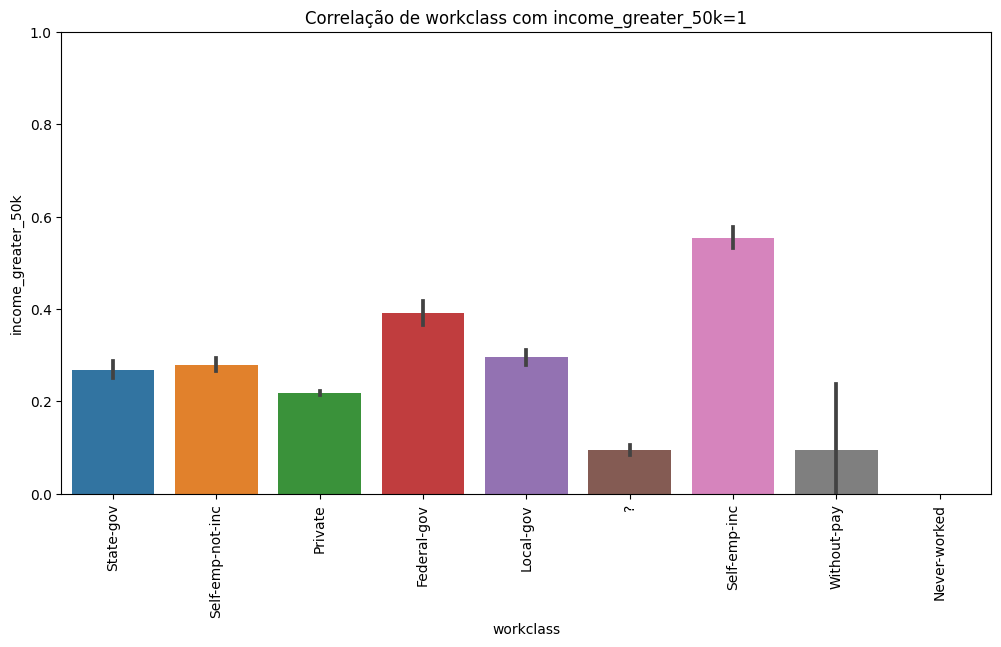

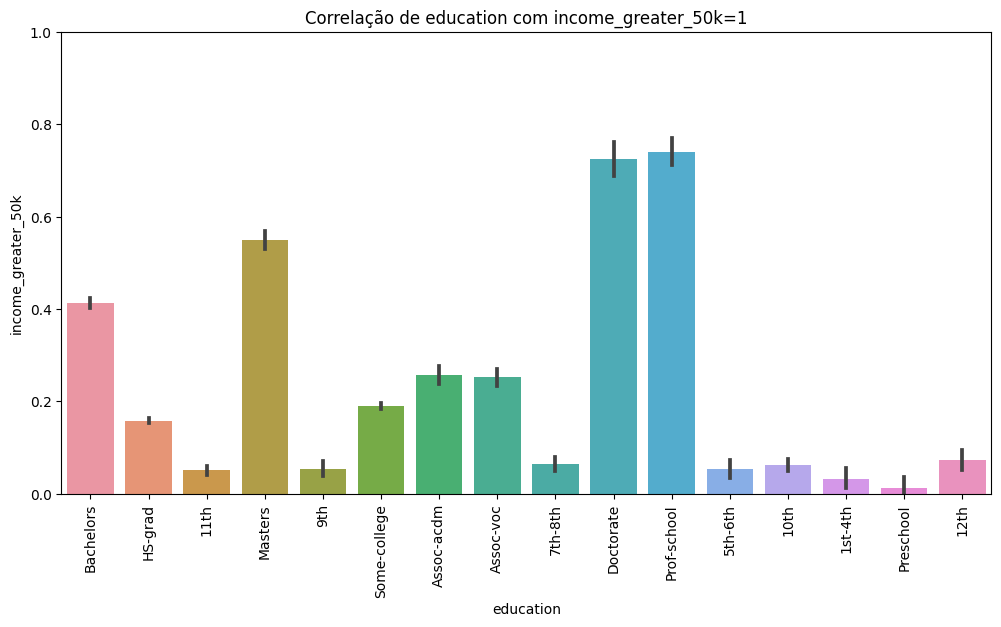

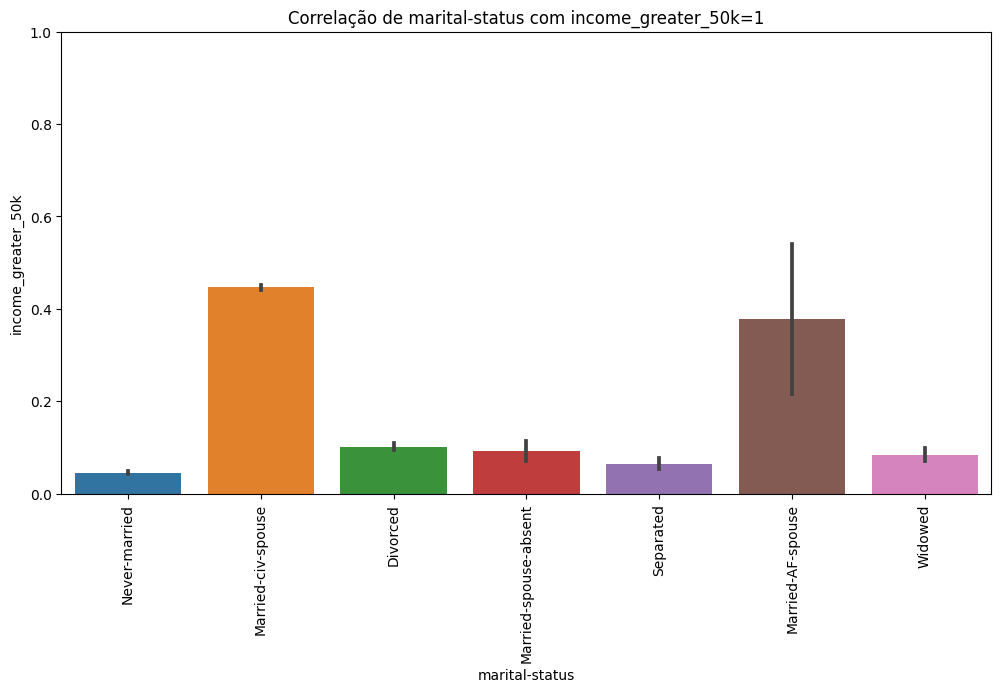

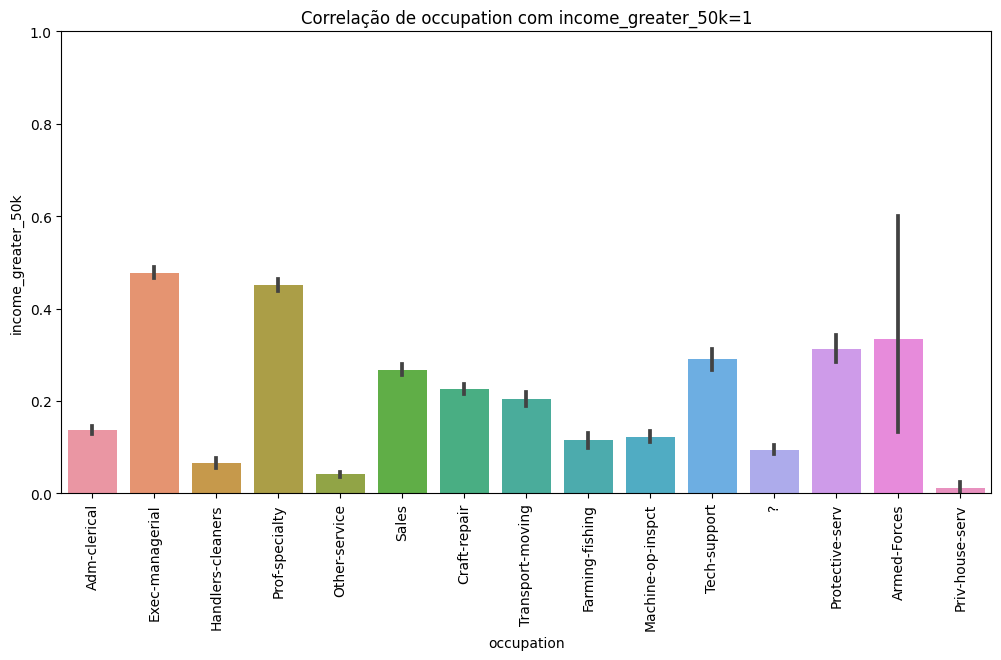

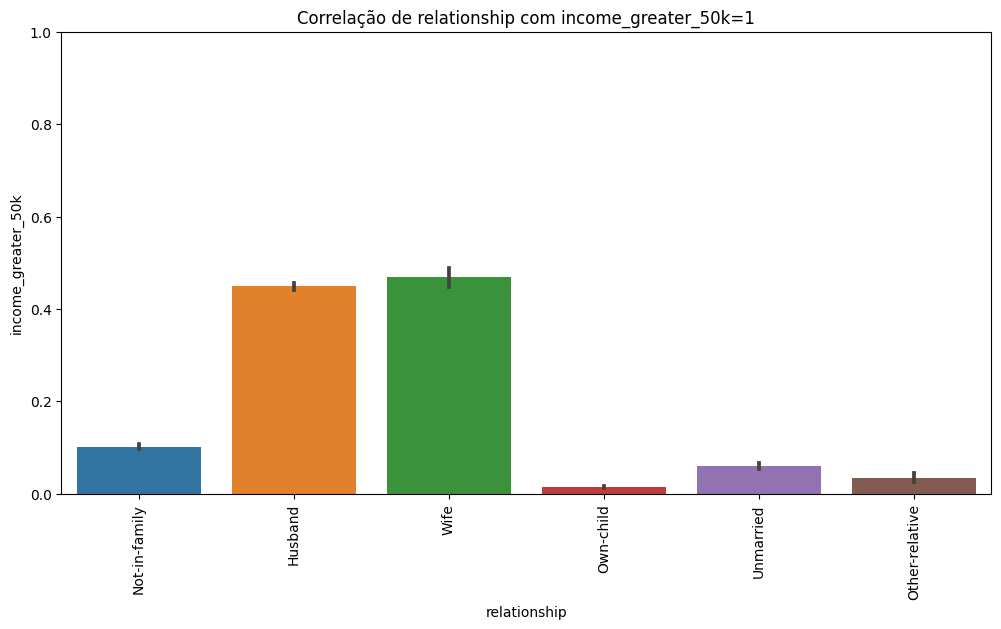

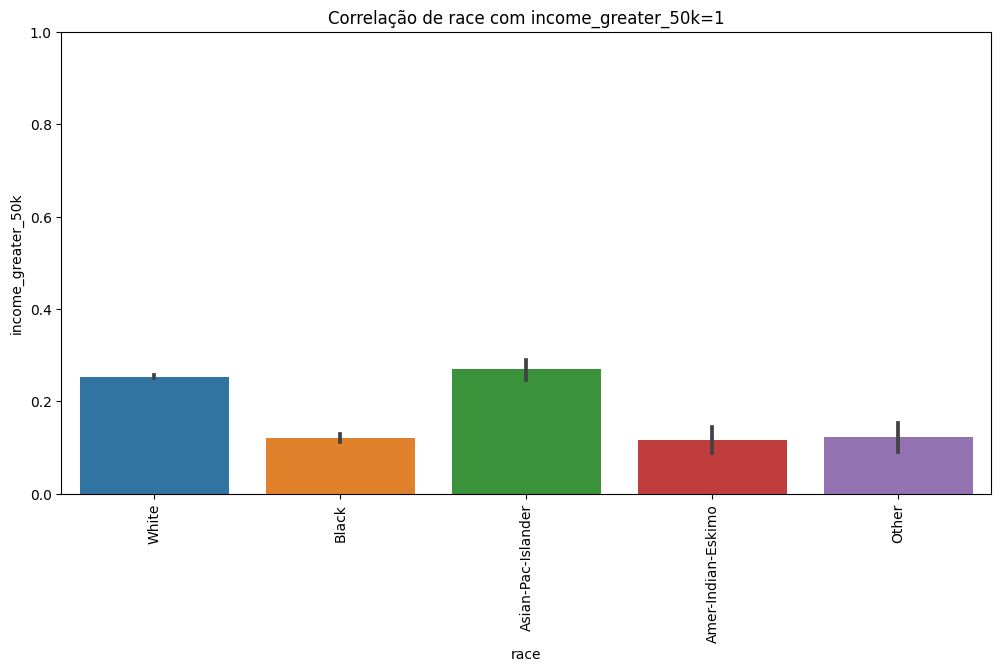

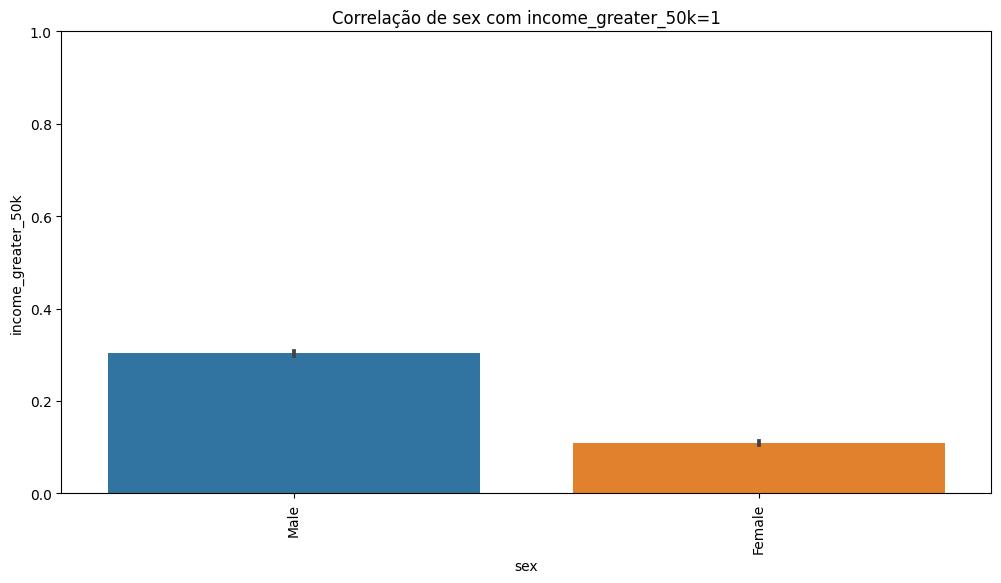

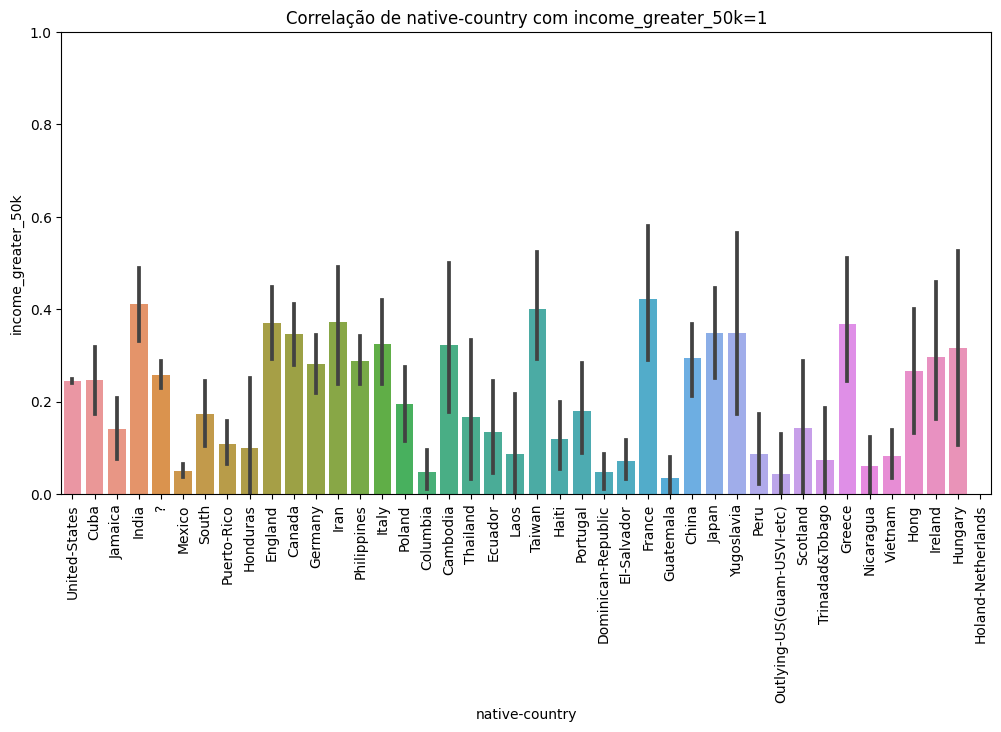

In [34]:
# Obtenha a lista de atributos categóricos
atributos_categoricos = dataset.select_dtypes(include=['object']).columns

# Crie um loop para analisar cada atributo categórico
for categoria in atributos_categoricos:
    # Plote gráficos de barras da proporção de instâncias com target = 1 em cada categoria
    plt.figure(figsize=(12, 6))
    sns.barplot(data=dataset, x=categoria, y=target_column, estimator=lambda x: sum(x) / len(x))
    plt.title(f'Correlação de {categoria} com {target_column}=1')
    plt.ylim(0, 1)  # Define a escala Y de 0 a 1
    plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor legibilidade
    plt.show()

Avaliação das correlações das variáveis categóricas

Para o atributo **workclass** verifica-se uma moderada correlação quando esta variável tem os valores de *Self-emp-inc* ou *Federal-gov*

Para o atributo **education**, verifica-se uma alta correlação quando esta variável tem os valores de *Doctorate* ou *Prof-School*, e também valores moderados quando os valores são *Mastress* ou *Bachelors*.

Para o atributo **marital-status** verifica-se uma moderada correlação quando esta variável possui os valores *Married-civ-spouse* ou *Married-AF-spouse* (nesse último caso, com maior variabilidade nos dados, influenciando no intervalo de confiança).

Para o atributo **ocupation** verifica-se uma moderada correlação quando esta variável possui os valores *Exec-managerial*, *Prof-speciality* e *Armed-Forces* (nesse último caso, com maior variabilidade nos dados, influenciando no intervalo de confiança).

Para o atributo **relationship** verifica-se uma moderada correlação quando esta variável possui os valores *Husband* ou *Wife*.

Para o atributo **native-country** verifica-se uma moderada correlação quando esta variável possui os valores referentes a algumas nacionalidades como Índia, Inglaterra, Irã, Taiwan, França, etc.  (nesses casos, observa-se maior variabilidade nos dados, influenciando no intervalo de confiança)

Para os atributos **race** e  **sex** verificou-se uma baixa correlação para qualquer dos valores das variáveis.

##6. Conclusão

A partir das análise anteriormente efetuadas, podemos depreender que, *para o contexto do dataset analisado*, pessoas com altos níveis de educacao (Doutorado e Escolas Profissionais) tem as maiores chances terem alcançado uma renda superior a 50 mil dólares americanos em 1994.   

Além disso, pessoas auto empregadas ou que trabalhem para o governo americano, pessoas com níveis de ensino de Bacharel ou Mestrado, pessoas casadas, pessoas originárias de certas nacionalidades, bem como pessoas ocupadas em áreas de gerenciamento executivo, professores especializados ou integrantes das forças armadas também tem boas chances de terem alcançado uma renda superior a 50 mil dólares americanos em 1994.